In [1]:
'''
'Fraud' in credit card transactions is unauthorized and
unwanted usage of an account by someone other than the
owner of that account. Necessary prevention measures can be
taken to stop this abuse and the behaviour of such fraudulent
practices can be studied to minimize it and protect against
similar occurrences in the future.


Our Method uses a Random Forest Classifier to detect fraudelent transactions on a Real world dataset.

The Reasearch Paper being compared to uses Local Outlier Factor and Isolation Forest Algorithm 
nonethless our method will use Random Forest to show that it is a better method than the two.


The error metric used to compare is the F1 score, which ranges from 0 (total failure) to 1 (perfect score). 
Hence, the closer your score is to 1, the better your model.

F1 Score: A performance score that combines both precision and recall.
It is a harmonic mean of these two variables. Formula is given as: 2*Precision*Recall/(Precision + Recall)

Precision: This is an indicator of the number of items correctly identified as positive 
out of total items identified as positive. Formula is given as: TP/(TP+FP)

Recall / Sensitivity / True Positive Rate (TPR): This is an indicator of the number of items 
correctly identified as positive out of total actual positives. Formula is given as: TP/(TP+FN)

Where:

TP=True Positive
FP=False Positive
TN=True Negative
FN=False Negative

In the end when we look at the scores for the frudelent transcations which has a class label of 1 the scores are 
higher when compared to the two methods in the Paper. 

'''

"\n'Fraud' in credit card transactions is unauthorized and\nunwanted usage of an account by someone other than the\nowner of that account. Necessary prevention measures can be\ntaken to stop this abuse and the behaviour of such fraudulent\npractices can be studied to minimize it and protect against\nsimilar occurrences in the future.\n\n\nOur Method uses a Random Forest Classifier to detect fraudelent transactions on a Real world dataset.\n\nThe Reasearch Paper being compared to uses Local Outlier Factor and Isolation Forest Algorithm \nnonethless our method will use Random Forest to show that it is a better method than the two.\n\n\nThe error metric used to compare is the F1 score, which ranges from 0 (total failure) to 1 (perfect score). \nHence, the closer your score is to 1, the better your model.\n\nF1 Score: A performance score that combines both precision and recall.\nIt is a harmonic mean of these two variables. Formula is given as: 2*Precision*Recall/(Precision + Recall)\n\nPr

In [2]:
'''
First, We are Going to Import the necessary Libraries, We will be importing others as we need. This First 
Libraries will Help us with Data Analysis and Preperation of our Data for Modelling. 
'''


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [3]:
#we then set the size of our graph and display the maximum amount of columns in this part
sns.set(rc={'figure.figsize':(13, 10)})
pd.set_option('display.max_columns',None)

In [4]:
#Next We read in our Data

train = pd.read_csv('data.csv',parse_dates=['TransactionStartTime'])

In [5]:
#Let's see how our data looks by sampling some rows

train.sample(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
4238,TransactionId_97380,BatchId_129984,AccountId_4841,SubscriptionId_3829,CustomerId_1510,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-496.0,496,2018-11-20 05:22:35+00:00,2,0
12529,TransactionId_23526,BatchId_23288,AccountId_4357,SubscriptionId_4524,CustomerId_4814,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-12-01 04:57:41+00:00,2,0
87374,TransactionId_82715,BatchId_13033,AccountId_4841,SubscriptionId_3829,CustomerId_806,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-06 19:37:24+00:00,2,0
80887,TransactionId_45986,BatchId_38234,AccountId_3014,SubscriptionId_1575,CustomerId_3439,UGX,256,ProviderId_1,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-02-01 10:53:34+00:00,4,0
5068,TransactionId_132699,BatchId_130169,AccountId_3185,SubscriptionId_2267,CustomerId_3613,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2018-11-21 14:02:50+00:00,2,0


In [6]:
'''

TransactionId - Unique transaction identifier on platform

BatchId - Unique number assigned to a batch of transactions for processing

AccountId - Unique number identifying the customer on platform

SubscriptionId - Unique number identifying the customer subscription

CustomerId - Unique identifier attached to Account

CurrencyCode - Country currency

CountryCode - Numerical geographical code of country

ProviderId - Source provider of Item bought.

ProductId - Item name being bought.

ProductCategory - ProductIds are organized into these broader product categories.

ChannelId - Identifies if customer used web,Android, IOS, pay later or checkout.

Amount - Value of the transaction. Positive for debits from customer account
and negative for credit into customer account

Value - Absolute value of the amount

TransactionStartTime - Transaction start time

PricingStrategy - Category of Xente's pricing structure for merchants

FraudResult - Fraud status of transaction 1 -yes or 0-No


'''

"\n\nTransactionId - Unique transaction identifier on platform\n\nBatchId - Unique number assigned to a batch of transactions for processing\n\nAccountId - Unique number identifying the customer on platform\n\nSubscriptionId - Unique number identifying the customer subscription\n\nCustomerId - Unique identifier attached to Account\n\nCurrencyCode - Country currency\n\nCountryCode - Numerical geographical code of country\n\nProviderId - Source provider of Item bought.\n\nProductId - Item name being bought.\n\nProductCategory - ProductIds are organized into these broader product categories.\n\nChannelId - Identifies if customer used web,Android, IOS, pay later or checkout.\n\nAmount - Value of the transaction. Positive for debits from customer account\nand negative for credit into customer account\n\nValue - Absolute value of the amount\n\nTransactionStartTime - Transaction start time\n\nPricingStrategy - Category of Xente's pricing structure for merchants\n\nFraudResult - Fraud status o

In [7]:
#This Looks at the Data Types of Each Column in our data.
train.dtypes

TransactionId                        object
BatchId                              object
AccountId                            object
SubscriptionId                       object
CustomerId                           object
CurrencyCode                         object
CountryCode                           int64
ProviderId                           object
ProductId                            object
ProductCategory                      object
ChannelId                            object
Amount                              float64
Value                                 int64
TransactionStartTime    datetime64[ns, UTC]
PricingStrategy                       int64
FraudResult                           int64
dtype: object

In [8]:
#Are there any missing values in the data, We look to ensure we have no Rows missing some data. ML models
#do not work well with missing Values

train.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [9]:
# The Pandas Profiling Library helps us To get an oversight of our data. 


pp.ProfileReport(train)


In [10]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(train['FraudResult'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('Frauds', round(train['FraudResult'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

No Frauds 99.8 % of the dataset
Frauds 0.2 % of the dataset


In [11]:
%matplotlib inline

/home/felixo/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

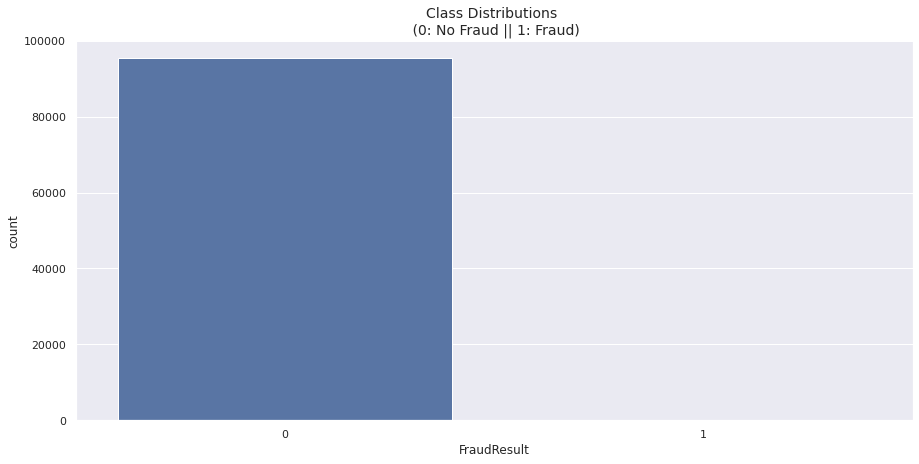

In [12]:
fig = plt.figure(figsize=(15,7))
sns.countplot('FraudResult', data=train)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [13]:
train['ProductCategory'].value_counts()

financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: ProductCategory, dtype: int64

Text(0.5, 1.0, 'PLOT SHOWING WHICH PRODUCT WAS UTILIZED IN THE APP')

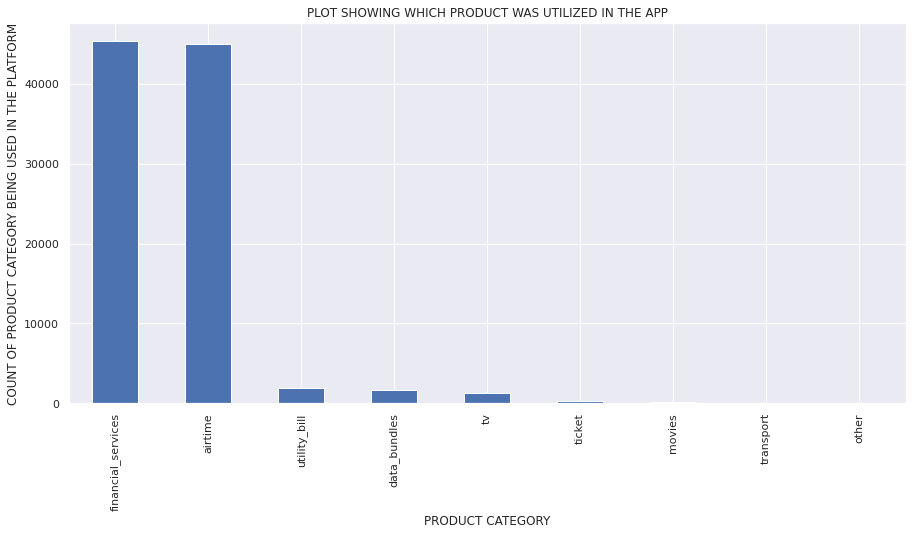

In [14]:
fig = plt.figure(figsize=(15,7))
train['ProductCategory'].value_counts().plot(kind='bar')
plt.xlabel('PRODUCT CATEGORY')
plt.ylabel('COUNT OF PRODUCT CATEGORY BEING USED IN THE PLATFORM')
plt.title('PLOT SHOWING WHICH PRODUCT WAS UTILIZED IN THE APP')

In [15]:
print(round(train['ProductCategory'].value_counts()/len(train) * 100,2))

financial_services    47.46
airtime               47.07
utility_bill           2.01
data_bundles           1.69
tv                     1.34
ticket                 0.23
movies                 0.18
transport              0.03
other                  0.00
Name: ProductCategory, dtype: float64


In [16]:
channel = train['ChannelId'].value_counts()

Text(0.5, 1.0, 'IDENTIFIES IF CUSTOMER USED WEB, ANDROID, IOS, PAY LATER OR CHECKOUT')

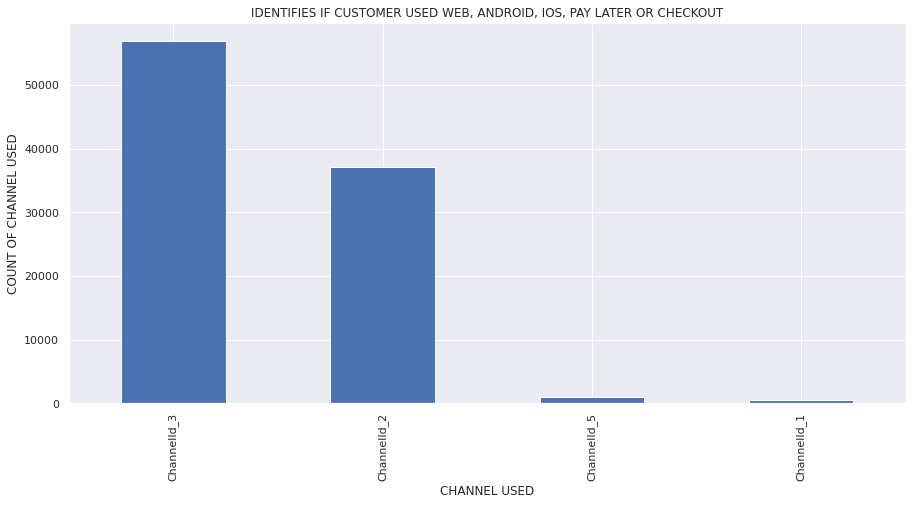

In [17]:
# Channel ID identifies if customer used web,Android, IOS, pay later or checkout
fig = plt.figure(figsize=(15,7))
channel.plot(kind='bar')
plt.xlabel('CHANNEL USED')
plt.ylabel('COUNT OF CHANNEL USED')
plt.title('IDENTIFIES IF CUSTOMER USED WEB, ANDROID, IOS, PAY LATER OR CHECKOUT')

In [18]:
print(round(train['ChannelId'].value_counts()/len(train) * 100,2))

ChannelId_3    59.52
ChannelId_2    38.83
ChannelId_5     1.10
ChannelId_1     0.56
Name: ChannelId, dtype: float64


In [19]:
train['PricingStrategy'].value_counts()

2    79848
4    13562
1     1867
0      385
Name: PricingStrategy, dtype: int64

In [20]:
pricing = train['PricingStrategy'].value_counts()

Text(0.5, 1.0, 'CATEGORY OF XENTE PRICING STRUCTURE FOR MERCHANTS')

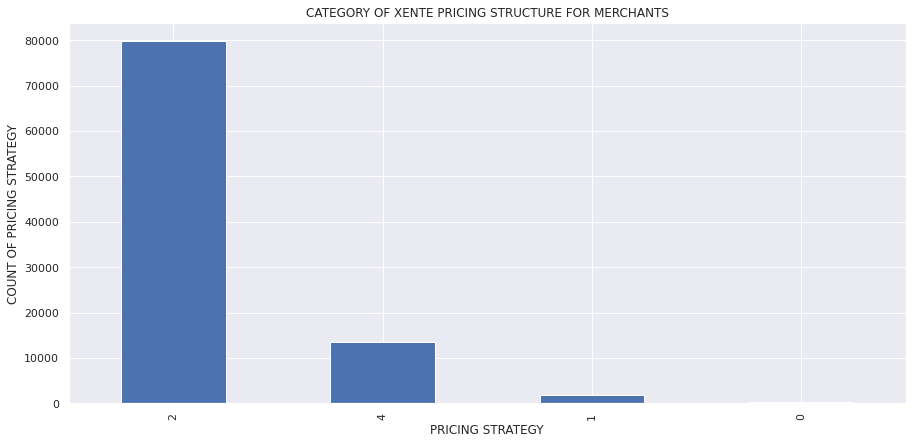

In [21]:
fig = plt.figure(figsize=(15,7))
pricing.plot(kind='bar')
plt.xlabel('PRICING STRATEGY')
plt.ylabel('COUNT OF PRICING STRATEGY')
plt.title('CATEGORY OF XENTE PRICING STRUCTURE FOR MERCHANTS')

In [22]:
print(round(train['PricingStrategy'].value_counts()/len(train) * 100,2))

2    83.47
4    14.18
1     1.95
0     0.40
Name: PricingStrategy, dtype: float64


In [23]:
train['ProviderId'].value_counts()

ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: ProviderId, dtype: int64

In [24]:
provider = train['ProviderId'].value_counts()

Text(0.5, 1.0, 'SOURCE PROVIDER OF ITEM BEING BOUGHT.')

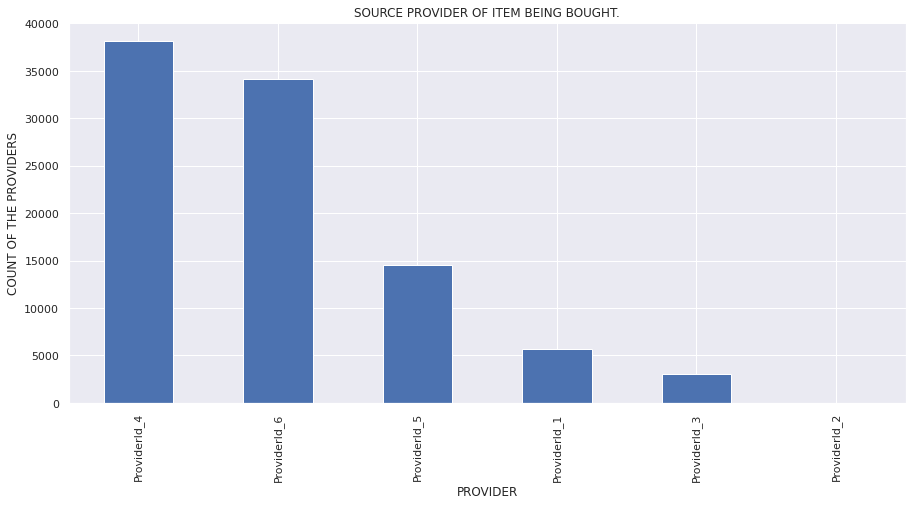

In [25]:
fig = plt.figure(figsize=(15,7))
provider.plot(kind='bar')
plt.xlabel('PROVIDER')
plt.ylabel('COUNT OF THE PROVIDERS')
plt.title('SOURCE PROVIDER OF ITEM BEING BOUGHT.')

In [26]:
print(round(train['ProviderId'].value_counts()/len(train) * 100,2))

ProviderId_4    39.92
ProviderId_6    35.74
ProviderId_5    15.20
ProviderId_1     5.90
ProviderId_3     3.22
ProviderId_2     0.02
Name: ProviderId, dtype: float64


In [27]:
train['ProductId'].value_counts()

ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
ProductId_13      296
ProductId_2       236
ProductId_20      216
ProductId_8       197
ProductId_24      175
ProductId_22      112
ProductId_7        86
ProductId_27       31
ProductId_5        25
ProductId_9        17
ProductId_16       10
ProductId_12        2
ProductId_23        1
Name: ProductId, dtype: int64

In [28]:
print(round(train['ProductId'].value_counts()/len(train) * 100,2))

ProductId_6     34.11
ProductId_3     25.45
ProductId_10    16.08
ProductId_15    12.51
ProductId_1      3.02
ProductId_4      2.51
ProductId_21     1.58
ProductId_11     1.44
ProductId_19     1.01
ProductId_14     0.82
ProductId_13     0.31
ProductId_2      0.25
ProductId_20     0.23
ProductId_8      0.21
ProductId_24     0.18
ProductId_22     0.12
ProductId_7      0.09
ProductId_27     0.03
ProductId_5      0.03
ProductId_9      0.02
ProductId_16     0.01
ProductId_12     0.00
ProductId_23     0.00
Name: ProductId, dtype: float64


Text(0.5, 1.0, 'SHOWS THE PRODUCTS BOUGHT THROUGH THE APP')

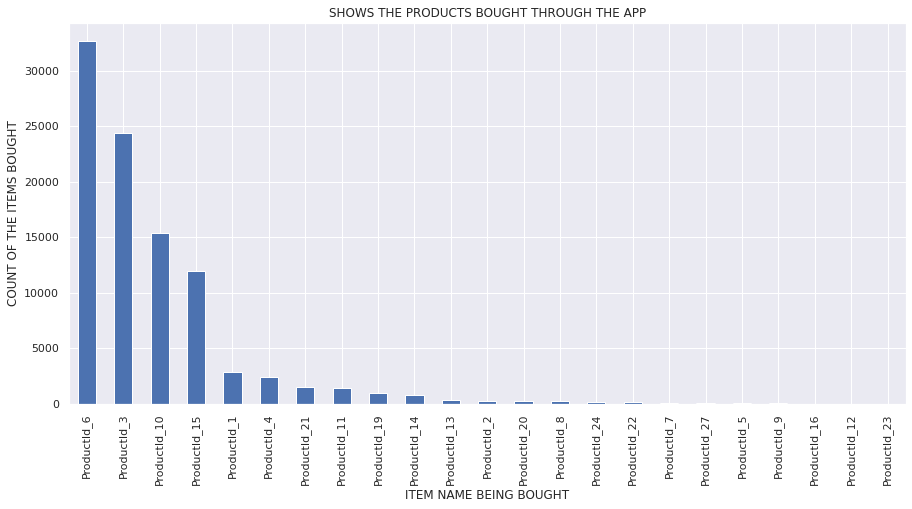

In [29]:
fig = plt.figure(figsize=(15,7))
train['ProductId'].value_counts().plot(kind='bar')
plt.xlabel('ITEM NAME BEING BOUGHT')
plt.ylabel('COUNT OF THE ITEMS BOUGHT')
plt.title('SHOWS THE PRODUCTS BOUGHT THROUGH THE APP')

# Data Preparation and Feature Engineering

In [30]:
'''
We will not be using this Variables further in the task as We deem them not useful for our model based on our 
data anaysis
'''

reject = ['CountryCode','CurrencyCode','Amount','CustomerId']

In [31]:
train.drop(reject,axis=1,inplace=True)

In [32]:
#Examine the Number of Columns and Rows after Droppin the Columns
print(train.shape)

(95662, 12)


In [33]:
import re

In [34]:
def add_datepart(df, fldname, drop=True, time=False, errors="raise"):
    """add_datepart converts a column of df from a datetime64 to many columns containing
    the information from the date. This applies changes inplace.
    Parameters:
    -----------
    df: A pandas data frame. df gain several new columns.
    fldname: A string that is the name of the date column you wish to expand.
        If it is not a datetime64 series, it will be converted to one with pd.to_datetime.
    drop: If true then the original date column will be removed.
    time: If true time features: Hour, Minute, Second will be added.
    Examples:
    ---------
    >>> df = pd.DataFrame({ 'A' : pd.to_datetime(['3/11/2000', '3/12/2000', '3/13/2000'], infer_datetime_format=False) })
    >>> df
        A
    0   2000-03-11
    1   2000-03-12
    2   2000-03-13
    >>> add_datepart(df, 'A')
    >>> df
        AYear AMonth AWeek ADay ADayofweek ADayofyear AIs_month_end AIs_month_start AIs_quarter_end AIs_quarter_start AIs_year_end AIs_year_start AElapsed
    0   2000  3      10    11   5          71         False         False           False           False             False        False          952732800
    1   2000  3      10    12   6          72         False         False           False           False             False        False          952819200
    2   2000  3      11    13   0          73         False         False           False           False             False        False          952905600
    """
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [35]:
add_datepart(train, 'TransactionStartTime')

/home/felixo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [36]:
print(train.shape)

(95662, 24)


In [37]:
train.dtypes

TransactionId                           object
BatchId                                 object
AccountId                               object
SubscriptionId                          object
ProviderId                              object
ProductId                               object
ProductCategory                         object
ChannelId                               object
Value                                    int64
PricingStrategy                          int64
FraudResult                              int64
TransactionStartTimeYear                 int64
TransactionStartTimeMonth                int64
TransactionStartTimeWeek                 int64
TransactionStartTimeDay                  int64
TransactionStartTimeDayofweek            int64
TransactionStartTimeDayofyear            int64
TransactionStartTimeIs_month_end          bool
TransactionStartTimeIs_month_start        bool
TransactionStartTimeIs_quarter_end        bool
TransactionStartTimeIs_quarter_start      bool
TransactionSt

In [38]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype

In [39]:
def train_cats(df):
    """Change any columns of strings in a panda's dataframe to a column of
    categorical values. This applies the changes inplace.
    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category
    """
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()

In [40]:
train_cats(train)

In [41]:
train.dtypes

TransactionId                           category
BatchId                                 category
AccountId                               category
SubscriptionId                          category
ProviderId                              category
ProductId                               category
ProductCategory                         category
ChannelId                               category
Value                                      int64
PricingStrategy                            int64
FraudResult                                int64
TransactionStartTimeYear                   int64
TransactionStartTimeMonth                  int64
TransactionStartTimeWeek                   int64
TransactionStartTimeDay                    int64
TransactionStartTimeDayofweek              int64
TransactionStartTimeDayofyear              int64
TransactionStartTimeIs_month_end            bool
TransactionStartTimeIs_month_start          bool
TransactionStartTimeIs_quarter_end          bool
TransactionStartTime

In [42]:
train.drop(['TransactionId', 'BatchId','AccountId', 'SubscriptionId'],axis=1,inplace=True)

In [43]:
'''
The Get Dummies changes the Objects to Integers  for Modelling

'''

train = pd.get_dummies(train,columns=['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId'],drop_first=True)


In [44]:
print(train.shape)

(95662, 54)


# Model Building and Evaluation

In [45]:
# Separate input features and target

# Putting features variable to X
X = train.drop('FraudResult',axis=1)

# Putting response variable to y
y = train['FraudResult']

In [46]:
# Importing train-test-split this helps to have train and validation data to ensure our model is Robust

from sklearn.model_selection import train_test_split

In [47]:
# setting up Validation and training sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=27,shuffle=True)

In [48]:
#We will First import SMOTE

'''
Feeding imbalanced data to your classifier can make it biased in favor of the majority class,
simply because it did not have enough data to learn about the minority


Just like the name suggests, the technique generates synthetic data for the minority class.

SMOTE proceeds by joining the points of the minority class with line segments 
and then places artificial points on these lines.

'''

from imblearn.over_sampling import SMOTE

In [50]:
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [51]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [52]:
# This is where we Build our Model

rfc = RandomForestClassifier(n_estimators=300,criterion='gini',max_features='sqrt',min_samples_leaf=2,min_samples_split=2,n_jobs=-1)

In [53]:
# train the Model with Our Training Data
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                       n_estimators=300, n_jobs=-1)

In [54]:
# predict Our Prediction from the Model we Built
y_pred = rfc.predict(X_valid)

In [55]:
# evaluation metrics

'''
This Is the Metric we use to see How our Models Performed on the Predictions, We test using 
the Data That we Split initially. 
'''

from sklearn.metrics import classification_report,confusion_matrix 

In [56]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23864
           1       0.69      0.87      0.77        52

    accuracy                           1.00     23916
   macro avg       0.85      0.93      0.88     23916
weighted avg       1.00      1.00      1.00     23916



In [57]:
print(confusion_matrix(y_valid,y_pred))

[[23844    20]
 [    7    45]]


In [58]:
cm = confusion_matrix(y_valid,y_pred)

<AxesSubplot:>

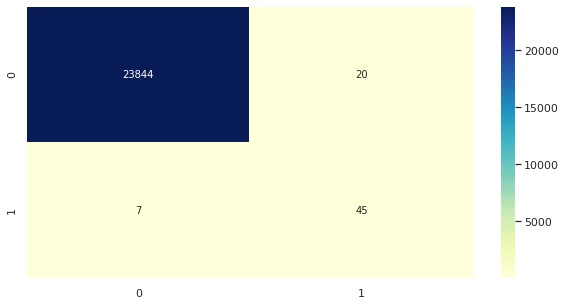

In [59]:
fig = plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='YlGnBu')

In [60]:
from sklearn.metrics import accuracy_score,f1_score

In [61]:
print(round(f1_score(y_valid,y_pred)*100,2))

76.92


In [62]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [63]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [66]:
fi = rf_feat_importance(rfc, X_valid)

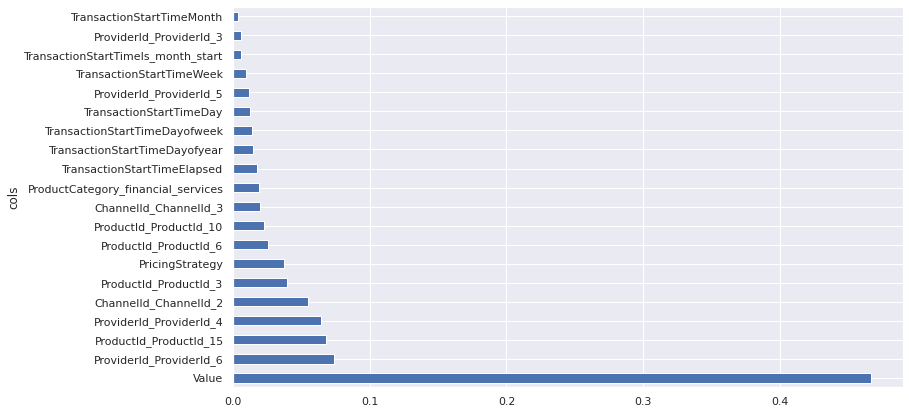

In [67]:
plot_fi(fi[:20]);

In [ ]:
'''
When Compared to the Research Paper The F1 Score Is Higher at 77% When Compared to  
Local Outlier Factor and Isolation Forest Algorithm from the Paper.

'''